In [1]:
# For basic inline static plots (most common)
%matplotlib inline

# For interactive matplotlib plots with zoom/pan capabilities
%matplotlib widget

# Exploratory data analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
orders = pd.read_csv("orders.csv/orders.csv", delimiter="|")
infos = pd.read_csv("infos.csv", delimiter="|")
items = pd.read_csv("items.csv", delimiter="|")

In [4]:
orders.head(10)

,time,transactID,itemID,order,salesPrice
0,2018-01-01 00:01:56,2278968,450,1,17.42
1,2018-01-01 00:01:56,2278968,83,1,5.19
2,2018-01-01 00:07:11,2255797,7851,2,20.47
3,2018-01-01 00:09:24,2278968,450,1,17.42
4,2018-01-01 00:09:24,2278968,83,1,5.19
5,2018-01-01 00:39:26,2257125,9375,1,31.02
6,2018-01-01 00:51:59,2278968,450,1,17.42
7,2018-01-01 00:51:59,2278968,83,1,5.19
8,2018-01-01 00:51:59,2278968,19,1,77.64
9,2018-01-01 00:51:59,2278968,297,1,43.53


In [5]:
orders.describe()

,transactID,itemID,order,salesPrice
count,2.181955e+06,2.181955e+06,2.181955e+06,2.181955e+06
mean,1.073262e+06,5.247717e+03,1.244553e+00,3.668124e+01
std,6.312578e+05,2.454623e+03,6.665127e-01,1.261080e+02
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,5.313775e+05,3.605000e+03,1.000000e+00,7.120000e+00
50%,1.065659e+06,5.200000e+03,1.000000e+00,1.668000e+01
75%,1.600670e+06,7.314000e+03,1.000000e+00,3.462000e+01
max,2.294042e+06,1.046300e+04,1.000000e+02,9.387020e+03


In [6]:
orders = orders[orders["salesPrice"] > 0]

In [7]:
orders.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2181362 entries, 0 to 2181954
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   time        object 
 1   transactID  int64  
 2   itemID      int64  
 3   order       int64  
 4   salesPrice  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 99.9+ MB


In [8]:
infos.head()

,itemID,simulationPrice,promotion
0,1,3.43,NaN
1,2,9.15,NaN
2,3,14.04,NaN
3,4,14.10,NaN
4,5,7.48,NaN


In [9]:
infos.describe(include="all")

,itemID,simulationPrice,promotion
count,10463.000000,10463.000000,1843
unique,NaN,NaN,85
top,NaN,NaN,2018-07-04
freq,NaN,NaN,169
mean,5232.000000,122.010808,NaN
std,3020.552267,469.701306,NaN
min,1.000000,0.380000,NaN
25%,2616.500000,8.990000,NaN
50%,5232.000000,23.830000,NaN
75%,7847.500000,63.125000,NaN


In [10]:
infos.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10463 entries, 0 to 10462
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   itemID           10463 non-null  int64  
 1   simulationPrice  10463 non-null  float64
 2   promotion        1843 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 245.4+ KB


In [11]:
items.head(10)

,itemID,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice
0,1,0,1,4.38,1,1,1,8.84
1,2,0,2,3.00,1,2,1,16.92
2,3,0,3,5.00,1,3,1,15.89
3,4,0,2,4.44,1,2,1,40.17
4,5,0,2,2.33,1,1,1,17.04
5,6,0,2,4.20,1,2,1,20.90
6,7,0,3,4.00,1,3,1,26.40
7,8,0,4,5.00,1,1,1,14.13
8,9,0,5,5.00,1,1,1,165.06
9,10,0,4,5.00,1,1,1,19.43


In [12]:
items.describe(include="all")

,itemID,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice
count,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000
mean,5232.000000,56.108286,115.710982,1.408953,4.238077,22.506929,4.108573,118.283142
std,3020.552267,75.983983,77.269249,2.135633,2.530146,14.868889,2.534010,339.338973
min,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.460000
25%,2616.500000,0.000000,47.000000,0.000000,2.000000,8.000000,2.000000,13.950000
50%,5232.000000,0.000000,107.000000,0.000000,4.000000,23.000000,4.000000,24.220000
75%,7847.500000,101.000000,173.000000,4.000000,7.000000,38.000000,7.000000,67.920000
max,10463.000000,274.000000,253.000000,5.000000,8.000000,52.000000,8.000000,6955.000000


In [13]:
items.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10463 entries, 0 to 10462
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   itemID                  10463 non-null  int64  
 1   brand                   10463 non-null  int64  
 2   manufacturer            10463 non-null  int64  
 3   customerRating          10463 non-null  float64
 4   category1               10463 non-null  int64  
 5   category2               10463 non-null  int64  
 6   category3               10463 non-null  int64  
 7   recommendedRetailPrice  10463 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 654.1 KB


# Feature engineeing

## Promotion

In [14]:
# Whole period max
orders['in_promotion'] = orders['salesPrice'] < orders.groupby('itemID', observed=False)['salesPrice'].transform('max')

# Historical max
#orders['in_promotion'] = orders['salesPrice'] < orders.groupby('itemID', observed=False)['salesPrice'].transform('cummax')

# Compared to recommended price
#orders = orders.merge(items[['itemID', 'recommendedRetailPrice']], on='itemID', how='left')
#orders['in_promotion'] = orders['salesPrice'] < orders['recommendedRetailPrice']

In [15]:
orders["time"] = pd.to_datetime(orders["time"])

In [16]:
# Revenue per promotion category per unit of transaction number
orders.groupby("in_promotion")[["order", "salesPrice"]].apply(lambda x: (x["order"]*x["salesPrice"]).sum()) / orders.groupby("in_promotion")["order"].size()

in_promotion
False    42.301512
True     38.701083
dtype: float64

In [17]:
 # Total order quantity per promotion category
orders.groupby("in_promotion")["order"].sum() / orders.groupby("in_promotion")["order"].size()

in_promotion
False    1.241072
True     1.249771
Name: order, dtype: float64

## Aggregation

In [18]:
# Store only date
agg_result = orders.copy()
agg_result.rename(columns={"time": "date"}, inplace=True)
agg_result["date"] = pd.to_datetime(orders["time"].dt.date)

In [19]:
# Group by date and itemID
agg_result_temp = agg_result.copy()
agg_result_temp['weighted_price_temp'] = agg_result_temp['salesPrice'] / agg_result_temp['order']

# Aggregate the different columns in particular way
agg_result = agg_result_temp.groupby(["date", "itemID"]).agg({
    'order': 'sum',
    'weighted_price_temp': 'mean',
    'in_promotion': 'max'
}).rename(columns={'weighted_price_temp': 'weightedAveragePrice'}).reset_index()

In [20]:
# Set column types
agg_result["order"] = agg_result["order"].astype(int)
agg_result["itemID"] = agg_result["itemID"].astype("category")
agg_result["in_promotion"] = agg_result["in_promotion"].astype(bool)

## Customer rating indicator

In [21]:
# Add column idicating if customer rating is missing
items["customerRatingIndicator"] = items["customerRating"] == 0

In [22]:
# Join the aggregated order table with items
joined_tables = agg_result.join(items, how="left", on="itemID", rsuffix="infos")
result = joined_tables.drop(columns="itemIDinfos")
result.head()

,date,itemID,order,weightedAveragePrice,in_promotion,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice,customerRatingIndicator
0,2018-01-01,9,1,199.840000,False,0.0,4.0,5.0,1.0,1.0,1.0,19.43,False
1,2018-01-01,11,1,2.130000,False,0.0,2.0,5.0,1.0,3.0,1.0,10.15,False
2,2018-01-01,19,2,77.640000,True,0.0,6.0,5.0,1.0,5.0,1.0,566.03,False
3,2018-01-01,26,109,13.323121,True,0.0,8.0,2.6,1.0,1.0,1.0,5.44,False
4,2018-01-01,35,446,353.949175,True,1.0,13.0,0.0,1.0,5.0,1.0,1949.67,True


In [23]:
# Set the colum names of the merged tables
result["itemID"] = result["itemID"].astype("category")
result["brand"] = result["brand"].astype("category")
result["manufacturer"] = result["manufacturer"].astype("category")
#result["customerRating"] = result["customerRating"].astype(int)
result["category1"] = result["category1"].astype("category")
result["category2"] = result["category2"].astype("category")
result["category3"] = result["category3"].astype("category")
result["recommendedRetailPrice"] = result["recommendedRetailPrice"].astype(float)

In [24]:
result.dtypes

date                       datetime64[ns]
itemID                           category
order                               int64
weightedAveragePrice              float64
in_promotion                         bool
brand                            category
manufacturer                     category
customerRating                    float64
category1                        category
category2                        category
category3                        category
recommendedRetailPrice            float64
customerRatingIndicator            object
dtype: object

In [25]:
result.head()

,date,itemID,order,weightedAveragePrice,in_promotion,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice,customerRatingIndicator
0,2018-01-01,9,1,199.840000,False,0.0,4.0,5.0,1.0,1.0,1.0,19.43,False
1,2018-01-01,11,1,2.130000,False,0.0,2.0,5.0,1.0,3.0,1.0,10.15,False
2,2018-01-01,19,2,77.640000,True,0.0,6.0,5.0,1.0,5.0,1.0,566.03,False
3,2018-01-01,26,109,13.323121,True,0.0,8.0,2.6,1.0,1.0,1.0,5.44,False
4,2018-01-01,35,446,353.949175,True,1.0,13.0,0.0,1.0,5.0,1.0,1949.67,True


## Discount of recommended price

In [26]:
# Calculate the recommended price discount
result["recommendedRetailPriceDiscount"] = (result["weightedAveragePrice"] - result["recommendedRetailPrice"]) / result["recommendedRetailPrice"]

## Date and time features

In [27]:
# Add date features
result["weekDay"] = result["date"].dt.weekday + 1
result["day"] = result["date"].dt.day
result["week"] = result["date"].dt.isocalendar().week
result["weekOfMonth"] = (result["date"].dt.day + result["date"].dt.weekday) // 7 + 1

In [28]:
result.head()

,date,itemID,order,weightedAveragePrice,in_promotion,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice,customerRatingIndicator,recommendedRetailPriceDiscount,weekDay,day,week,weekOfMonth
0,2018-01-01,9,1,199.840000,False,0.0,4.0,5.0,1.0,1.0,1.0,19.43,False,9.285126,1,1,1,1
1,2018-01-01,11,1,2.130000,False,0.0,2.0,5.0,1.0,3.0,1.0,10.15,False,-0.790148,1,1,1,1
2,2018-01-01,19,2,77.640000,True,0.0,6.0,5.0,1.0,5.0,1.0,566.03,False,-0.862834,1,1,1,1
3,2018-01-01,26,109,13.323121,True,0.0,8.0,2.6,1.0,1.0,1.0,5.44,False,1.449103,1,1,1,1
4,2018-01-01,35,446,353.949175,True,1.0,13.0,0.0,1.0,5.0,1.0,1949.67,True,-0.818457,1,1,1,1


## Lagging features

## Rolling windows

## Filter

## FFT

In [29]:
result.groupby("in_promotion")[["order", "weightedAveragePrice"]].apply(lambda x: (x["order"]*x["weightedAveragePrice"]).sum()) / result.groupby("in_promotion")["order"].size()

in_promotion
False    1027.230287
True      653.519947
dtype: float64

In [30]:
result.groupby("in_promotion")["order"].sum() / result.groupby("in_promotion")["order"].size()

in_promotion
False    31.837454
True     22.556832
Name: order, dtype: float64

In [31]:
result.to_csv("results.csv", index=False)

In [32]:
result.shape

(100135, 18)

In [39]:
# Sample of products
sampled_product_ids = result["itemID"].astype(int).unique()
sampled_product_ids = pd.Series(sampled_product_ids).sample(n=100, random_state=1)
sampled_data = result[result["itemID"].isin(sampled_product_ids)]

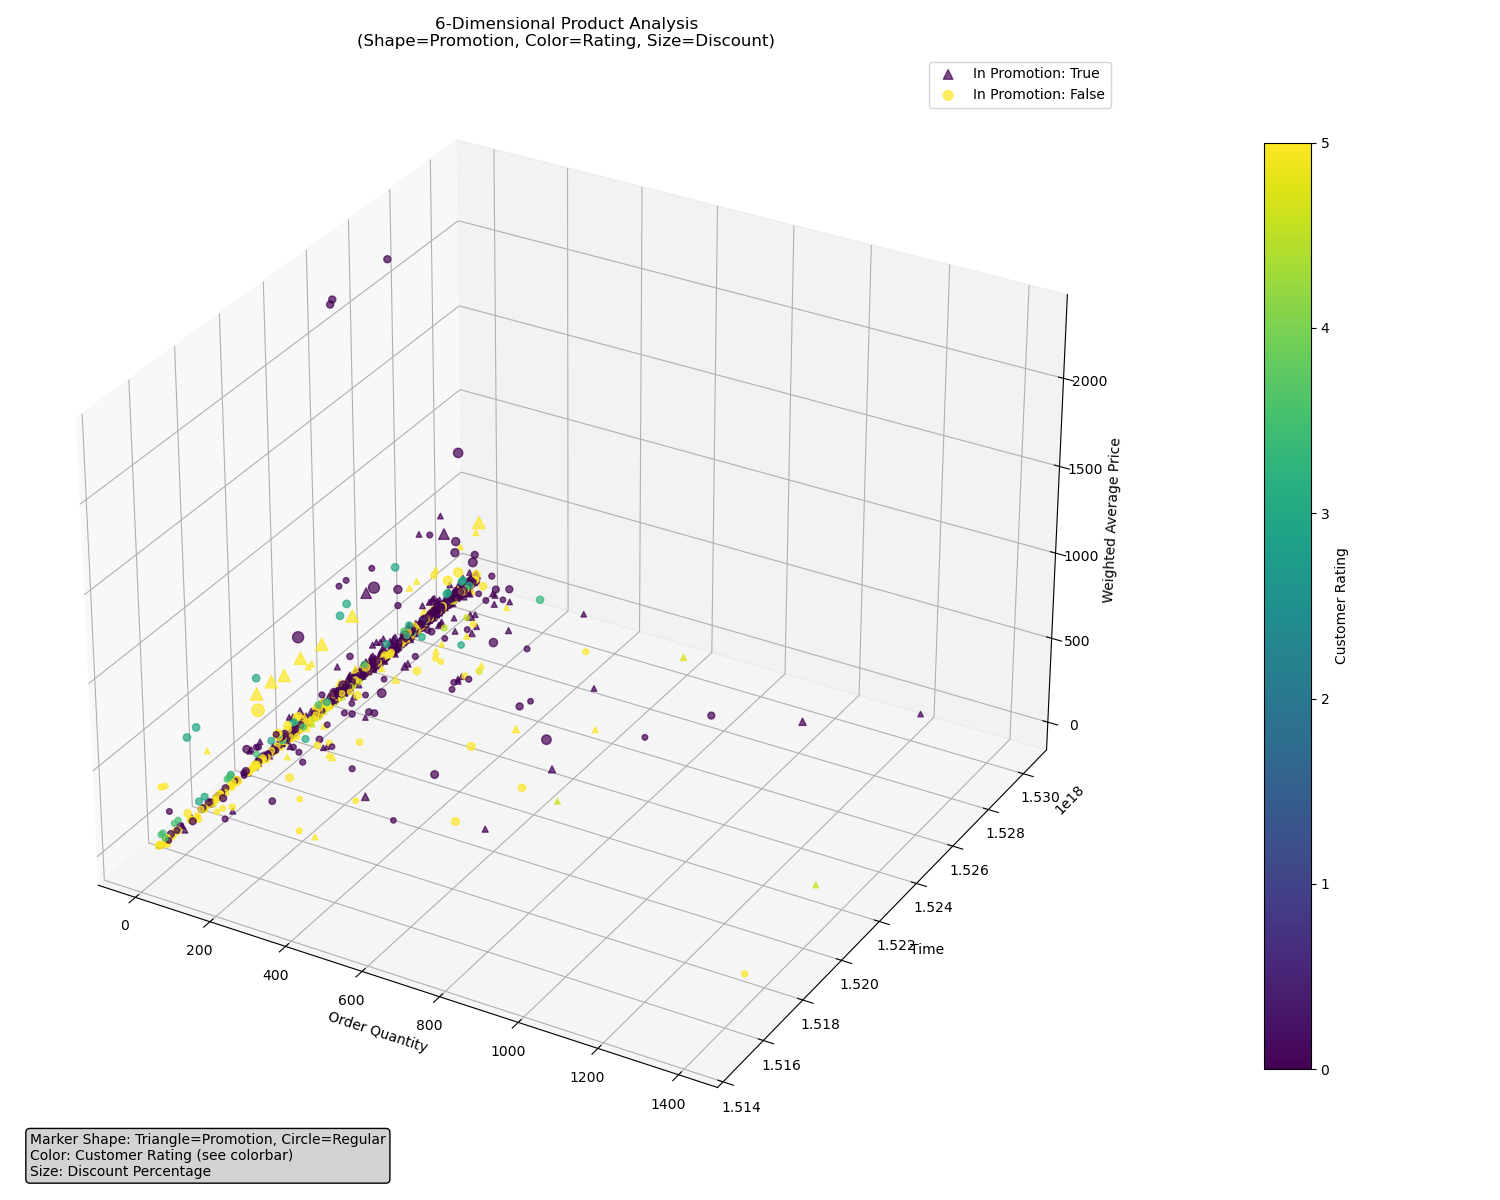

In [40]:
# Create the 3D plot
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# Define markers for promotion status
markers = {True: '^', False: 'o'}  # Triangle for promotion, circle for regular

# Define color map for customer rating
colors = plt.cm.viridis(sampled_data['customerRating'] / sampled_data['customerRating'].max())

# Define sizes based on discount (scale for visibility)
sizes = 20 + (sampled_data['recommendedRetailPriceDiscount'] * 5)  # Base size 20, scale by discount

# Create separate scatter plots for each promotion status (for different markers)
for promo_status in [True, False]:
    mask = sampled_data['in_promotion'] == promo_status
    if mask.any():
        ax.scatter(
            sampled_data.loc[mask, 'order'],           # X: order quantity
            sampled_data.loc[mask, 'date'].astype(int),            # Y: time (you might need to convert to numeric)
            sampled_data.loc[mask, 'weightedAveragePrice'],  # Z: weighted average price
            c=colors[mask],                  # Color: customer rating
            s=sizes[mask],                   # Size: discount percentage
            marker=markers[promo_status],    # Shape: promotion status
            alpha=0.7,
            label=f'In Promotion: {promo_status}'
        )

# Customize the plot
ax.set_xlabel('Order Quantity')
ax.set_ylabel('Time')
ax.set_zlabel('Weighted Average Price')
ax.set_title('6-Dimensional Product Analysis\n(Shape=Promotion, Color=Rating, Size=Discount)')

# Add legends
ax.legend()

# Color bar for customer rating
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=sampled_data['customerRating'].min(), vmax=sampled_data['customerRating'].max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.8, pad=0.1)
cbar.set_label('Customer Rating')

# Add text explanation
fig.text(0.02, 0.02, 
         'Marker Shape: Triangle=Promotion, Circle=Regular\n'
         'Color: Customer Rating (see colorbar)\n'
         'Size: Discount Percentage', 
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))

plt.tight_layout()
plt.show()